# TimeSeries avec Seaborn

In [1]:
# Gestion des imports
import configparser
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
# Gestion de la configuration
config = configparser.ConfigParser()
config.read('../Configuration.conf')

['../Configuration.conf']

In [3]:
# Obtention du chemin de travail
cheminressources = config.get('Chemin', 'resources')
print("Le chemin des fichiers de ressources est : \n", cheminressources)

Le chemin des fichiers de ressources est : 
 /Users/Fred/Desktop/POEi_Lille/09_Python_Prepa_Analyse_par_la_Pratique/resources/


In [4]:
# CHARGEMENT DU FICHIER D’ENTREE
data = pd.read_csv(cheminressources + 'Marathon.csv', sep = ',')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [5]:
# NOMBRE DE LIGNES ET DE COLONNES
data.shape

(37250, 4)

In [6]:
# FORMAT DU FICHIER CHARGE
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [7]:
# ON RENOMME DES COLONNES
data.rename(columns = {data.columns[0]:'Age',
                       data.columns[1]:'Sexe',
                       data.columns[2]:'Tps_mi_course',
                       data.columns[3]:'Tps_arrivee'}, inplace = True)

In [8]:
# CREATION DE COLONNES DE Temps EN SECONDES A L'AIDE D'UNE FONCTION
def convert_seconds(chaine):
    hh, mm, ss = map(int, chaine.split(':'))
    nbsecondes = hh * 60 * 60 + mm * 60 + ss
    return nbsecondes

data['Tps_mi_course_sec'] = data['Tps_mi_course'].apply(convert_seconds)
data['Tps_arrivee_sec'] = data['Tps_arrivee'].apply(convert_seconds)

In [17]:
# CREATION D'UNE COLONNE Ratio ( Tps_mi_course / Tps_arrivee )
data['Ratio'] = data['Tps_mi_course_sec'] / data['Tps_arrivee_sec']
data.head()

,Age,Sexe,Tps_mi_course,Tps_arrivee,Tps_mi_course_sec,Tps_arrivee_sec,Ratio
0,33,M,01:05:38,02:08:51,3938,7731,0.509378
1,32,M,01:06:26,02:09:28,3986,7768,0.513131
2,31,M,01:06:49,02:10:42,4009,7842,0.511222
3,38,M,01:06:16,02:13:45,3976,8025,0.495452
4,31,M,01:06:32,02:13:59,3992,8039,0.496579


In [18]:
# AFFICHAGE DES 5 PREMIERES LIGNES DU TABLEAU
data.head()

,Age,Sexe,Tps_mi_course,Tps_arrivee,Tps_mi_course_sec,Tps_arrivee_sec,Ratio
0,33,M,01:05:38,02:08:51,3938,7731,0.509378
1,32,M,01:06:26,02:09:28,3986,7768,0.513131
2,31,M,01:06:49,02:10:42,4009,7842,0.511222
3,38,M,01:06:16,02:13:45,3976,8025,0.495452
4,31,M,01:06:32,02:13:59,3992,8039,0.496579


In [19]:
# FORMAT DU FICHIER CHARGE
data.dtypes

Age                    int64
Sexe                  object
Tps_mi_course         object
Tps_arrivee           object
Tps_mi_course_sec      int64
Tps_arrivee_sec        int64
Ratio                float64
dtype: object

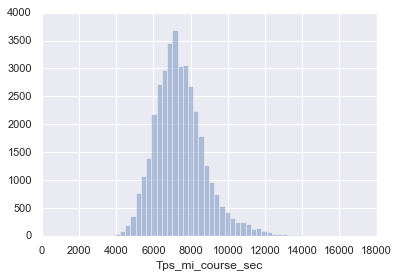

In [20]:
sns.distplot(data['Tps_mi_course_sec'], kde = False);
plt.axvline(0, color = "k", linestyle = "--");

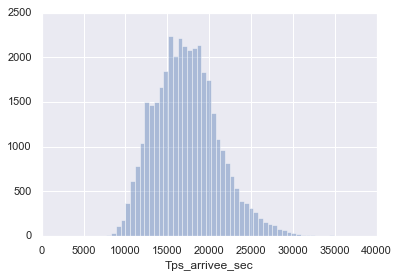

In [22]:
sns.distplot(data['Tps_arrivee_sec'], kde = False);
plt.axvline(0, color = "k", linestyle = "--");

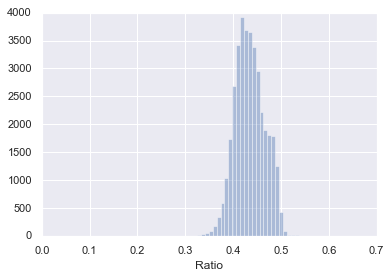

In [21]:
sns.distplot(data['Ratio'], kde = False);
plt.axvline(0, color = "k", linestyle = "--");

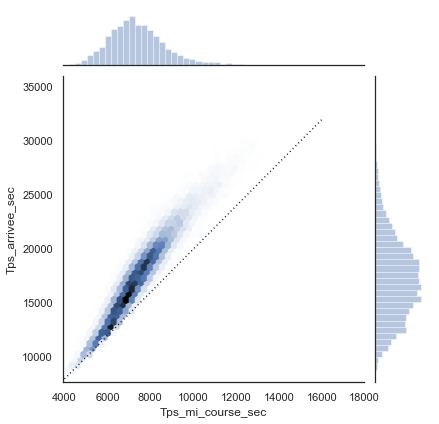

In [23]:
with sns.axes_style('white'):
    g = sns.jointplot("Tps_mi_course_sec", "Tps_arrivee_sec", data, kind = 'hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

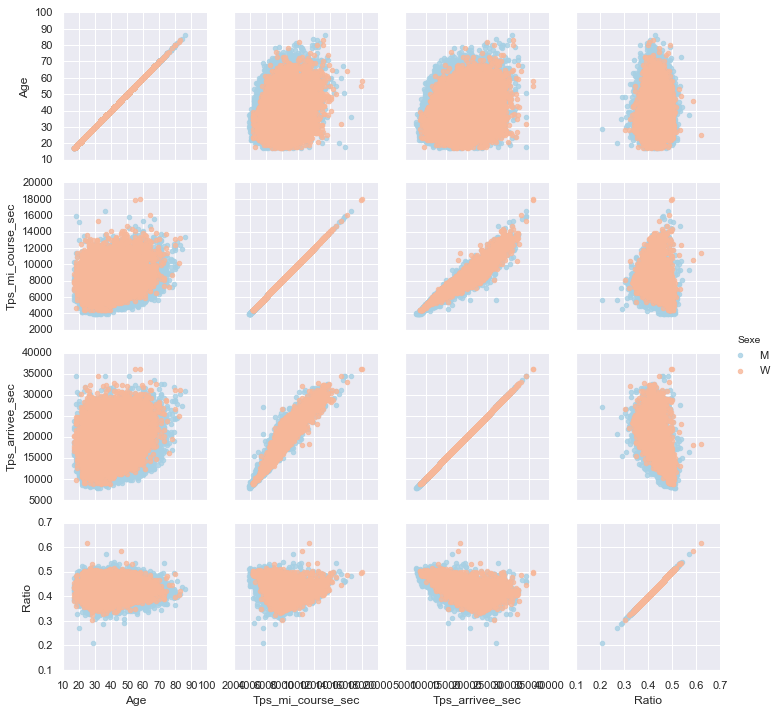

In [24]:
g = sns.PairGrid(data, vars=['Age', 'Tps_mi_course_sec', 'Tps_arrivee_sec', 'Ratio'],
                 hue = 'Sexe', palette = 'RdBu_r')
g.map(plt.scatter, alpha = 0.8)
g.add_legend()

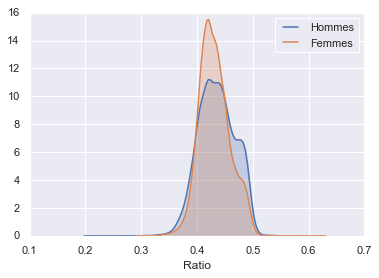

In [25]:
sns.kdeplot(data.Ratio[data.Sexe == 'M'], label = 'Hommes', shade = True)
sns.kdeplot(data.Ratio[data.Sexe == 'W'], label = 'Femmes', shade = True)
plt.xlabel('Ratio');

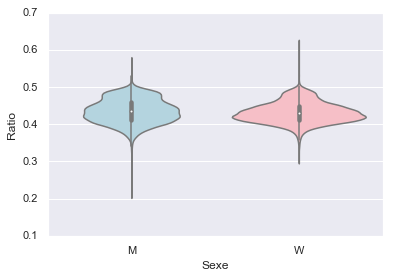

In [26]:
sns.violinplot("Sexe", "Ratio", data = data, palette = ["lightblue", "lightpink"]);

In [31]:
data['Tranche_age'] = data.Age.map(lambda age: 10 * (age // 10))
data.tail(10)

,Age,Sexe,Tps_mi_course,Tps_arrivee,Tps_mi_course_sec,Tps_arrivee_sec,Ratio,Tranche_age
37240,73,M,03:46:01,09:01:31,13561,32491,0.417377,70
37241,42,W,03:27:53,09:05:44,12473,32744,0.380925,40
37242,64,W,04:27:19,09:10:58,16039,33058,0.485178,60
37243,67,M,04:19:47,09:16:15,15587,33375,0.467026,60
37244,32,W,04:15:33,09:32:56,15333,34376,0.446038,30
37245,18,M,04:24:24,09:32:57,15864,34377,0.461471,10
37246,36,M,04:35:43,09:33:28,16543,34408,0.480789,30
37247,51,M,04:22:35,09:33:40,15755,34420,0.457728,50
37248,55,W,04:58:06,10:00:40,17886,36040,0.496282,50
37249,58,W,04:59:49,10:01:08,17989,36068,0.498752,50


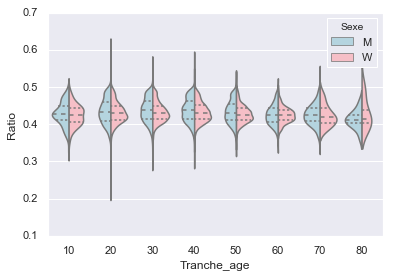

In [29]:
Hommes = (data.Sexe == 'M')
Femmes = (data.Sexe == 'W')

with sns.axes_style(style = None):
    sns.violinplot("Tranche_age", "Ratio", hue = "Sexe", data = data,
                  split = True, inner = "quartile", palette = ["lightblue", "lightpink"])

## Exercice